## Tennis Regression

In [2]:
cd C:\Users\allis\Desktop\Data Science\Project Showcase\Regression\data

C:\Users\allis\Desktop\Data Science\Project Showcase\Regression\data


In [3]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats import weightstats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
tennis_df_raw = pd.read_csv('tennis.csv')
tennis_df = tennis_df_raw.drop(columns=['year', 'tournament', 'start date', 'type', 'surface', 'draw',
       'atp points', 'atp ranking', 'tournament prize money', 'round',
       'opponent', 'ranking', 'score', 'stats link', 'tournament.1',
       'tournament round', 'time', 'winner',
       'player1 nationality', 'player1 aces', 'player1 double faults',
       'player1 1st serves in', 'player1 1st serves total',
       'player1 1st serve points won', 'player1 1st serve points total',
       'player1 2nd serve points won', 'player1 2nd serve points total',
       'player1 break points won', 'player1 break points total',
       'player1 service games played', 'player1 1st serve return points won',
       'player1 1st serve return points total',
       'player1 2nd serve return points won',
       'player1 2nd serve return points total',
       'player1 break points converted won',
       'player1 break points converted total', 'player1 return games played',
       'player1 total service points won',
       'player1 total service points total', 'player1 total return points won',
       'player1 total return points total', 'player2 nationality',
       'player2 aces', 'player2 double faults', 'player2 1st serves in',
       'player2 1st serves total', 'player2 1st serve points won',
       'player2 1st serve points total', 'player2 2nd serve points won',
       'player2 2nd serve points total', 'player2 break points won',
       'player2 break points total', 'player2 service games played',
       'player2 1st serve return points won',
       'player2 1st serve return points total',
       'player2 2nd serve return points won',
       'player2 2nd serve return points total',
       'player2 break points converted won',
       'player2 break points converted total', 'player2 return games played',
       'player2 total service points won',
       'player2 total service points total', 'player2 total return points won',
       'player2 total return points total', 'win'])
tennis_df = tennis_df.dropna()
tennis_df

,player1 name,player1 total points won,player1 total points total,player2 name,player2 total points won,player2 total points total
0,Roger Federer,41.0,103.0,Andre Agassi,62.0,103.0
1,Roger Federer,65.0,106.0,Guillaume Raoux,41.0,106.0
2,Roger Federer,79.0,148.0,Richard Fromberg,69.0,148.0
3,Roger Federer,60.0,130.0,Jan Siemerink,70.0,130.0
5,Roger Federer,63.0,136.0,Lucas Arnold Ker,73.0,136.0
...,...,...,...,...,...,...
1173,Roger Federer,96.0,164.0,Juan Martin Del Potro,68.0,164.0
1174,Roger Federer,130.0,276.0,Rafael Nadal,146.0,276.0
1175,Roger Federer,55.0,86.0,Nikolay Davydenko,31.0,86.0
1176,Roger Federer,60.0,99.0,Grega Zemlja,39.0,99.0


C:\Users\allis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(10.088757621931201, 2.1535995542319314e-23, 2052.0)

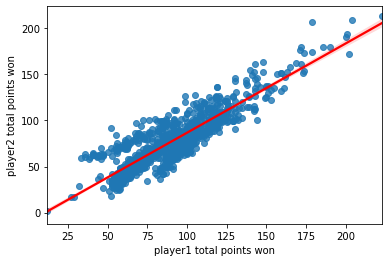

In [5]:
tennis_df['pts_diff'] = tennis_df['player1 total points won'] - tennis_df['player2 total points won']
tennis_df
X = sm.add_constant(range(len(tennis_df['player2 total points total'])))
Y = tennis_df['pts_diff']

#sns.regplot(tennis_df.index,Y,line_kws={"color": "red"})
sns.regplot(tennis_df['player1 total points won'],tennis_df['player2 total points won'],line_kws={"color": "red"})

t_res = weightstats.ttest_ind(tennis_df['player1 total points won'],tennis_df['player2 total points won'])
t_res

In [6]:
X = tennis_df['player1 total points won']
X = sm.add_constant(X)
model = sm.OLS(tennis_df['player2 total points won'],X).fit(cov_type = 'HC2')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     player2 total points won   R-squared:                       0.794
Model:                                  OLS   Adj. R-squared:                  0.794
Method:                       Least Squares   F-statistic:                     3276.
Date:                      Fri, 10 Sep 2021   Prob (F-statistic):          1.69e-321
Time:                              12:54:52   Log-Likelihood:                -4148.1
No. Observations:                      1027   AIC:                             8300.
Df Residuals:                          1025   BIC:                             8310.
Df Model:                                 1                                         
Covariance Type:                        HC2                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -10.1952      1.555     -6.555      0.000     -13.243      -7.147
player1 total points won     0.9683      0.017     57.239      0.000       0.935       1.001
==============================================================================
Omnibus:                       82.506   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.773
Skew:                           0.744   Prob(JB):                     1.31e-22
Kurtosis:                       3.373   Cond. No.                         299.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

C:\Users\allis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Private', ylabel='Apps'>

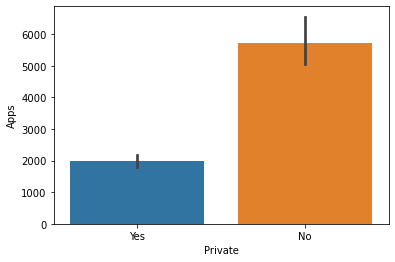

In [7]:
college_df = pd.read_csv('college.csv')
college_df
sns.barplot('Private','Apps',data = college_df)

C:\Users\allis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Top25perc   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1557.
Date:                Fri, 10 Sep 2021   Prob (F-statistic):          1.42e-187
Time:                        12:55:06   Log-Likelihood:                -2805.2
No. Observations:                 777   AIC:                             5614.
Df Residuals:                     775   BIC:                             5624.
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1984      0.746     37.785      0.000      26.736      29.661
Top10perc      1.0014      0.025     39.459      0.000       0.952       1.051
==============================================================================
Omnibus:                       45.943   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.462
Skew:                           0.401   Prob(JB):                     2.77e-19
Kurtosis:                       4.413   Cond. No.                         60.8
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

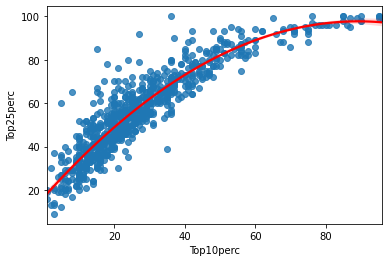

In [8]:
sns.regplot('Top10perc','Top25perc',order = 2,data = college_df,line_kws={"color": "red"})
Yc = college_df['Top25perc']
Xc = sm.add_constant(college_df['Top10perc'])
modelc = sm.OLS(Yc,Xc).fit(cov_type = 'HC2')
modelc.summary()

## Auto prediction

Using the `auto.csv` dataset, perform a simple linear regression with `mpg` as the response variable and horsepower as the predictor. Answer the following:

 i. Is there a relationship between the predictor and the response?
 
 ii. How strong is the relationship between the predictor and the response?
 
 iii. Is the relationship between the predictor and the response positive or negative?

 iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals ?

 v. Make a regression plot the response and the predictor.

In [10]:
auto_df_raw = pd.read_csv('auto.csv',sep = '\t', delimiter=r"\s+")
auto_df = auto_df_raw.dropna()

auto_df['mpg'] = auto_df['mpg'].astype(np.float64)
auto_df['horsepower'] = auto_df['horsepower'].replace('?',None)
auto_df['horsepower'] = auto_df['horsepower'].astype(np.float64)
Ya = auto_df['mpg']
Xa = sm.add_constant(auto_df['horsepower'])
modelc = sm.OLS(Ya,Xa).fit(cov_type = 'HC2')
modelc.summary()


<ipython-input-10-7aef78da8e59>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_df['mpg'] = auto_df['mpg'].astype(np.float64)
<ipython-input-10-7aef78da8e59>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_df['horsepower'] = auto_df['horsepower'].replace('?',None)
<ipython-input-10-7aef78da8e59>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     453.0
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           1.60e-67
Time:                        12:55:44   Log-Likelihood:                -1195.2
No. Observations:                 397   AIC:                             2394.
Df Residuals:                     395   BIC:                             2402.
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0619      0.859     46.612      0.000      38.377      41.746
horsepower    -0.1588      0.007    -21.285      0.000      -0.173      -0.144
==============================================================================
Omnibus:                       16.560   Durbin-Watson:                   0.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.444
Skew:                           0.494   Prob(JB):                     0.000163
Kurtosis:                       3.278   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

C:\Users\allis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

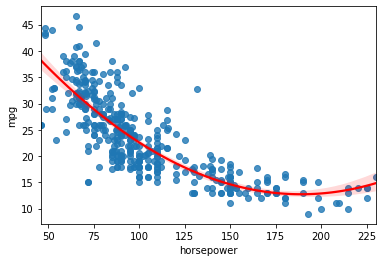

In [11]:
sns.regplot('horsepower','mpg',order = 2,data = auto_df,line_kws={"color": "red"})

# Titanic Regression


In [12]:
#Data Clean
dft_raw = sns.load_dataset('titanic')
dft = dft_raw.drop(columns= ['deck','embark_town','parch','sibsp','alive','who','embarked'])
dft = dft.dropna()
dft.reset_index()
dft['adult_male'] = dft['adult_male'].astype(int)
dft['alone'] = dft['alone'].astype(int)
dft['male'] = pd.get_dummies(dft['sex'],drop_first= True)
dft = dft.drop(columns=['sex'])
dft[['Second','Third']] = pd.get_dummies(dft['class'],drop_first= True)
dft = dft.drop(columns=['class'])
dft = dft.drop(columns=['pclass'])

Y = dft['survived']
Xraw = dft.drop(columns = ['survived'])
X = sm.add_constant(Xraw)

tmodel = sm.OLS(Y,X).fit(cov_type = 'HC2')
tmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     120.8
Date:                Fri, 10 Sep 2021   Prob (F-statistic):          2.92e-116
Time:                        12:57:37   Log-Likelihood:                -315.75
No. Observations:                 714   AIC:                             647.5
Df Residuals:                     706   BIC:                             684.1
Df Model:                           7                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0263      0.066     15.548      0.000       0.897       1.156
age           -0.0033      0.001     -2.827      0.005      -0.006      -0.001
fare           0.0001      0.000      0.274      0.784      -0.001       0.001
adult_male    -0.3701      0.082     -4.510      0.000      -0.531      -0.209
alone          0.0680      0.031      2.184      0.029       0.007       0.129
male          -0.1670      0.080     -2.085      0.037      -0.324      -0.010
Second        -0.1994      0.047     -4.259      0.000      -0.291      -0.108
Third         -0.3954      0.050     -7.862      0.000      -0.494      -0.297
==============================================================================
Omnibus:                       24.700   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.376
Skew:                           0.465   Prob(JB):                     1.87e-06
Kurtosis:                       3.152   Cond. No.                         478.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [13]:
Y = dft['survived']
Xraw = dft.drop(columns = ['survived'])
Xraw['age'] = dft.age/dft.age.mean()
X = sm.add_constant(Xraw)

tmodel = sm.OLS(Y,X).fit(cov_type = 'HC2')
tmodel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     120.8
Date:                Fri, 10 Sep 2021   Prob (F-statistic):          2.92e-116
Time:                        12:57:46   Log-Likelihood:                -315.75
No. Observations:                 714   AIC:                             647.5
Df Residuals:                     706   BIC:                             684.1
Df Model:                           7                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0263      0.066     15.548      0.000       0.897       1.156
age           -0.0973      0.034     -2.827      0.005      -0.165      -0.030
fare           0.0001      0.000      0.274      0.784      -0.001       0.001
adult_male    -0.3701      0.082     -4.510      0.000      -0.531      -0.209
alone          0.0680      0.031      2.184      0.029       0.007       0.129
male          -0.1670      0.080     -2.085      0.037      -0.324      -0.010
Second        -0.1994      0.047     -4.259      0.000      -0.291      -0.108
Third         -0.3954      0.050     -7.862      0.000      -0.494      -0.297
==============================================================================
Omnibus:                       24.700   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.376
Skew:                           0.465   Prob(JB):                     1.87e-06
Kurtosis:                       3.152   Cond. No.                         465.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [14]:
Y = dft['survived']
Xraw = dft.drop(columns = ['survived'])
Xraw['age'] = dft.age/dft.age.mean()
Xraw['fare'] = dft.fare/dft.fare.mean()
X = sm.add_constant(Xraw)

tmodel = sm.OLS(Y,X).fit(cov_type = 'HC2')
tmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     120.8
Date:                Fri, 10 Sep 2021   Prob (F-statistic):          2.92e-116
Time:                        12:57:56   Log-Likelihood:                -315.75
No. Observations:                 714   AIC:                             647.5
Df Residuals:                     706   BIC:                             684.1
Df Model:                           7                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0263      0.066     15.548      0.000       0.897       1.156
age           -0.0973      0.034     -2.827      0.005      -0.165      -0.030
fare           0.0036      0.013      0.274      0.784      -0.022       0.029
adult_male    -0.3701      0.082     -4.510      0.000      -0.531      -0.209
alone          0.0680      0.031      2.184      0.029       0.007       0.129
male          -0.1670      0.080     -2.085      0.037      -0.324      -0.010
Second        -0.1994      0.047     -4.259      0.000      -0.291      -0.108
Third         -0.3954      0.050     -7.862      0.000      -0.494      -0.297
==============================================================================
Omnibus:                       24.700   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.376
Skew:                           0.465   Prob(JB):                     1.87e-06
Kurtosis:                       3.152   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

## House Price prediction

Using the techniques you learned, use everything you can to build the best **interpretable** (eg. non-regularized) regression model on the `house_price.csv` dataset.

In [15]:
df = pd.read_csv('house_price.csv')
df = df.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','BsmtFinType1','BsmtFinType2','GarageFinish','GarageQual','SaleType','Id'])
df['LotFrontage'] = df['LotFrontage'].fillna(0)
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['Electrical'] = df['BsmtExposure'].fillna('None')
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageCond'] = df['GarageCond'].fillna('None')

#note: use for loop with big datasets
df[['FVzone','RHzone','RLzone','RMzone']] = pd.get_dummies(df.MSZoning, drop_first= True)
df = df.drop(columns= ['MSZoning'])
df['Street : Pvd/Grvl'] = pd.get_dummies(df.Street, drop_first= True)
df = df.drop(columns= ['Street'])
df[['LS:IR1','LS:IR2','LS:IR3']] = pd.get_dummies(df.LotShape, drop_first= True)
df = df.drop(columns= ['LotShape'])
df[['LC:BNK','LC:Low','LC:HLS']] = pd.get_dummies(df.LandContour, drop_first= True)
df = df.drop(columns= ['LandContour'])
df['Util:NoSeWa'] = pd.get_dummies(df.Utilities, drop_first= True)
df = df.drop(columns= ['Utilities'])
df[['Lconf:FR2','Lconf:Crnr','Lconf:CulDS','Lconf:FR3',]] = pd.get_dummies(df.LotConfig, drop_first= True)
df = df.drop(columns= ['LotConfig'])
df[['Lslp:Mod','Lslp:Sev',]] = pd.get_dummies(df.LandSlope, drop_first= True)
df = df.drop(columns= ['LandSlope'])
df[[ 'Nghbd : Veenker', 'Nghbd : Crawfor', 'Nghbd : NoRidge', 'Nghbd : Mitchel', 'Nghbd : Somerst',
       'Nghbd : NWAmes', 'Nghbd : OldTown', 'Nghbd : BrkSide', 'Nghbd : Sawyer', 'Nghbd : NridgHt', 'Nghbd : NAmes',
       'Nghbd : SawyerW', 'Nghbd : IDOTRR', 'Nghbd : MeadowV', 'Nghbd : Edwards', 'Nghbd : Timber', 'Nghbd : Gilbert',
       'Nghbd : StoneBr', 'Nghbd : ClearCr', 'Nghbd : NPkVill', 'Nghbd : Blmngtn', 'Nghbd : BrDale', 'Nghbd : SWISU',
       'Nghbd : Blueste']] = pd.get_dummies(df.Neighborhood, drop_first= True)
df = df.drop(columns= ['Neighborhood'])
df[['CD1 =Feedr', 'CD1 =PosN', 'CD1 =Artery', 'CD1 =RRAe', 'CD1 =RRNn', 'CD1 =RRAn', 'CD1 =PosA',
       'CD1 =RRNe']] = pd.get_dummies(df.Condition1, drop_first= True)
df = df.drop(columns= ['Condition1'])
df[['Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe']] = pd.get_dummies(df.Condition2, drop_first= True)
df = df.drop(columns= ['Condition2'])
df[['BldgTyp:2fmCon', 'BldgTyp:Duplex', 'BldgTyp:TwnhsE', 'BldgTyp:Twnhs']] = pd.get_dummies(df.BldgType, drop_first= True)
df = df.drop(columns= ['BldgType'])
df[['1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin']] = pd.get_dummies(df.HouseStyle, drop_first= True)
df = df.drop(columns= ['HouseStyle'])
df[['RfSyl:Hip', 'RfSyl : Gambrel', 'RfSyl : Mansard', 'RfSyl : Flat', 'RfSyl : Shed']] = pd.get_dummies(df.RoofStyle, drop_first= True)
df = df.drop(columns= ['RoofStyle'])
df[['RFMt:WdShngl', 'RFMt:Metal', 'RFMt:WdShake', 'RFMt:Membran', 'RFMt:Tar&Grv',
       'RFMt:Roll', 'RFMt:ClyTile']] = pd.get_dummies(df.RoofMatl, drop_first= True)
df = df.drop(columns= ['RoofMatl'])
df[['Ext1:MetalSd', 'Ext1:Wd Sdng', 'Ext1:HdBoard', 'Ext1:BrkFace', 'Ext1:WdShing',
       'Ext1:CemntBd', 'Ext1:Plywood', 'Ext1:AsbShng', 'Ext1:Stucco', 'Ext1:BrkComm', 'Ext1:AsphShn',
       'Ext1:Stone', 'Ext1:ImStucc', 'Ext1:CBlock']] = pd.get_dummies(df.Exterior1st, drop_first= True)
df = df.drop(columns= ['Exterior1st'])
df[['Ext2:MetalSd', 'Ext2:Wd Shng', 'Ext2:HdBoard', 'Ext2:Plywood', 'Ext2:Wd Sdng',
       'Ext2:CmentBd', 'Ext2:BrkFace', 'Ext2:Stucco', 'Ext2:AsbShng', 'Ext2:Brk Cmn', 'Ext2:ImStucc',
       'Ext2:AsphShn', 'Ext2:Stone', 'Ext2:Other', 'Ext2:CBlock']] = pd.get_dummies(df.Exterior2nd, drop_first= True)
df = df.drop(columns= ['Exterior2nd'])
df[['MVT:None', 'MVT:Stone', 'MVT:BrkCmn']] = pd.get_dummies(df.MasVnrType, drop_first= True)
df = df.drop(columns= ['MasVnrType'])
df[['ExtQual:TA', 'ExtQual:Ex', 'ExtQual:Fa']] = pd.get_dummies(df.ExterQual, drop_first= True)
df = df.drop(columns= ['ExterQual'])
df[['Extcond:Gd', 'Extcond:Fa', 'Extcond:Po', 'Extcond:Ex']] = pd.get_dummies(df.ExterCond, drop_first= True)
df = df.drop(columns= ['ExterCond'])
df[['Fndtn:CBlock', 'Fndtn:BrkTil', 'Fndtn:Wood', 'Fndtn:Slab', 'Fndtn:Stone']] = pd.get_dummies(df.Foundation, drop_first= True)
df = df.drop(columns= ['Foundation'])
df[['BQ:TA', 'BQ:Ex', 'BQ:None', 'BQ:Fa']] = pd.get_dummies(df.BsmtQual, drop_first= True)
df = df.drop(columns= ['BsmtQual'])
df[['BC:Gd', 'BC:None', 'BCFa', 'BC:Po']] = pd.get_dummies(df.BsmtCond, drop_first= True)
df = df.drop(columns= ['BsmtCond'])
df[['BE:Gd', 'BE:Mn', 'BE:Av', 'BE:None']] = pd.get_dummies(df.BsmtExposure, drop_first= True)
df = df.drop(columns= ['BsmtExposure'])
df[['Heat:GasW', 'Heat:Grav', 'Heat:Wall', 'Heat:OthW', 'Heat:Floor']] = pd.get_dummies(df.Heating, drop_first= True)
df = df.drop(columns= ['Heating'])
df[['Heatq:Gd', 'Heatq:Ta', 'Heatq:Fa', 'Heatq:Po']] = pd.get_dummies(df.HeatingQC, drop_first= True)
df = df.drop(columns= ['HeatingQC'])
df['Centralair'] = pd.get_dummies(df.CentralAir, drop_first= True)
df = df.drop(columns= ['CentralAir'])
df[['Elec:Gd', 'Elec:Mn', 'Elec:Av', 'Elec:None']] = pd.get_dummies(df.Electrical, drop_first= True)
df = df.drop(columns= ['Electrical'])
df[['kitqc:TA', 'kitqc:Ex', 'kitqc:Fa']] = pd.get_dummies(df.KitchenQual, drop_first= True)
df = df.drop(columns= ['KitchenQual'])
df[['Func:Min1', 'Func:Maj1', 'Func:Min2', 'Func:Mod', 'Func:Maj2', 'Func:Sev']] = pd.get_dummies(df.Functional, drop_first= True)
df = df.drop(columns= ['Functional'])
df[['Fa', 'None', 'Gd', 'Po', 'Ex']] = pd.get_dummies(df.GarageCond, drop_first= True)
df = df.drop(columns= ['GarageCond'])
df[['N', 'P']] = pd.get_dummies(df.PavedDrive, drop_first= True)
df = df.drop(columns= ['PavedDrive'])
df[['Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family']] = pd.get_dummies(df.SaleCondition, drop_first= True)
df = df.drop(columns= ['SaleCondition'])
df[['Detchd', 'BuiltIn', 'CarPort', 'None', 'Basment', '2Types']] = pd.get_dummies(df.GarageType, drop_first= True)
df = df.drop(columns= ['GarageType'])
df = df[np.isfinite(df).all(1)]

#normalizing , again should of used a for loop
for i in df.columns:
    if (df[i].dtype != 'uint8') == True:
        df[i] = df[i]/df[i].max()

In [16]:
Yh = df['SalePrice']
Xhr = df.drop(columns = ['SalePrice'])
Xh = sm.add_constant(Xhr)

modelh = sm.OLS(Yh,Xh).fit(cov_type = 'HC2')
modelh.summary()

C:\Users\allis\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 212, but rank is 181
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     80.41
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:59:46   Log-Likelihood:                 2943.3
No. Observations:                1371   AIC:                            -5485.
Df Residuals:                    1170   BIC:                            -4435.
Df Model:                         200                                         
Covariance Type:                  HC2                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.6377      1.397     -1.172      0.241      -4.376       1.101
MSSubClass           -0.0068      0.016     -0.427      0.669      -0.038       0.025
LotFrontage           0.0018      0.010      0.174      0.862      -0.018       0.022
LotArea               0.2226      0.053      4.226      0.000       0.119       0.326
OverallQual           0.0944      0.016      6.033      0.000       0.064       0.125
OverallCond           0.0731      0.011      6.879      0.000       0.052       0.094
YearBuilt             0.8403      0.211      3.981      0.000       0.427       1.254
YearRemodAdd          0.2127      0.126      1.692      0.091      -0.034       0.459
MasVnrArea            0.0384      0.022      1.784      0.074      -0.004       0.081
BsmtFinSF1            0.1438      0.028      5.219      0.000       0.090       0.198
BsmtFinSF2            0.0147      0.009      1.660      0.097      -0.003       0.032
BsmtUnfSF             0.0022      0.011      0.204      0.838      -0.019       0.023
TotalBsmtSF           0.1372      0.029      4.717      0.000       0.080       0.194
1stFlrSF              0.1602      0.029      5.520      0.000       0.103       0.217
2ndFlrSF              0.1276      0.027      4.742      0.000       0.075       0.180
LowQualFinSF          0.0073      0.023      0.321      0.748      -0.038       0.052
GrLivArea             0.1807      0.028      6.357      0.000       0.125       0.236
BsmtFullBath          0.0033      0.005      0.632      0.527      -0.007       0.014
BsmtHalfBath          0.0008      0.008      0.094      0.925      -0.016       0.017
FullBath              0.0113      0.009      1.192      0.233      -0.007       0.030
HalfBath             -0.0006      0.006     -0.106      0.915      -0.013       0.011
BedroomAbvGr         -0.0354      0.014     -2.554      0.011      -0.063      -0.008
KitchenAbvGr         -0.0638      0.024     -2.615      0.009      -0.112      -0.016
TotRmsAbvGrd          0.0255      0.022      1.167      0.243      -0.017       0.068
Fireplaces            0.0097      0.006      1.634      0.102      -0.002       0.021
GarageYrBlt           0.0631      0.185      0.340      0.734      -0.300       0.427
GarageCars            0.0241      0.014      1.677      0.094      -0.004       0.052
GarageArea            0.0293      0.027      1.100      0.271      -0.023       0.082
WoodDeckSF            0.0116      0.007      1.609      0.108      -0.003       0.026
OpenPorchSF           0.0030      0.011      0.267      0.789      -0.019       0.025
EnclosedPorch         0.0013      0.012      0.110      0.912      -0.022       0.025
3SsnPorch             0.0191      0.013      1.502      0.133      -0.006       0.044
ScreenPorch           0.0205      0.010      2.027      0.043       0.001

In [17]:
Yhn = df['SalePrice']
Xhrn = df.drop(columns = ['SalePrice'])
Xhn = sm.add_constant(Xhrn)

modelhn = sm.OLS(Yhn,Xhn).fit(cov_type = 'HC2')
modelhn.summary()

C:\Users\allis\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 212, but rank is 181
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     80.41
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:59:55   Log-Likelihood:                 2943.3
No. Observations:                1371   AIC:                            -5485.
Df Residuals:                    1170   BIC:                            -4435.
Df Model:                         200                                         
Covariance Type:                  HC2                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.6377      1.397     -1.172      0.241      -4.376       1.101
MSSubClass           -0.0068      0.016     -0.427      0.669      -0.038       0.025
LotFrontage           0.0018      0.010      0.174      0.862      -0.018       0.022
LotArea               0.2226      0.053      4.226      0.000       0.119       0.326
OverallQual           0.0944      0.016      6.033      0.000       0.064       0.125
OverallCond           0.0731      0.011      6.879      0.000       0.052       0.094
YearBuilt             0.8403      0.211      3.981      0.000       0.427       1.254
YearRemodAdd          0.2127      0.126      1.692      0.091      -0.034       0.459
MasVnrArea            0.0384      0.022      1.784      0.074      -0.004       0.081
BsmtFinSF1            0.1438      0.028      5.219      0.000       0.090       0.198
BsmtFinSF2            0.0147      0.009      1.660      0.097      -0.003       0.032
BsmtUnfSF             0.0022      0.011      0.204      0.838      -0.019       0.023
TotalBsmtSF           0.1372      0.029      4.717      0.000       0.080       0.194
1stFlrSF              0.1602      0.029      5.520      0.000       0.103       0.217
2ndFlrSF              0.1276      0.027      4.742      0.000       0.075       0.180
LowQualFinSF          0.0073      0.023      0.321      0.748      -0.038       0.052
GrLivArea             0.1807      0.028      6.357      0.000       0.125       0.236
BsmtFullBath          0.0033      0.005      0.632      0.527      -0.007       0.014
BsmtHalfBath          0.0008      0.008      0.094      0.925      -0.016       0.017
FullBath              0.0113      0.009      1.192      0.233      -0.007       0.030
HalfBath             -0.0006      0.006     -0.106      0.915      -0.013       0.011
BedroomAbvGr         -0.0354      0.014     -2.554      0.011      -0.063      -0.008
KitchenAbvGr         -0.0638      0.024     -2.615      0.009      -0.112      -0.016
TotRmsAbvGrd          0.0255      0.022      1.167      0.243      -0.017       0.068
Fireplaces            0.0097      0.006      1.634      0.102      -0.002       0.021
GarageYrBlt           0.0631      0.185      0.340      0.734      -0.300       0.427
GarageCars            0.0241      0.014      1.677      0.094      -0.004       0.052
GarageArea            0.0293      0.027      1.100      0.271      -0.023       0.082
WoodDeckSF            0.0116      0.007      1.609      0.108      -0.003       0.026
OpenPorchSF           0.0030      0.011      0.267      0.789      -0.019       0.025
EnclosedPorch         0.0013      0.012      0.110      0.912      -0.022       0.025
3SsnPorch             0.0191      0.013      1.502      0.133      -0.006       0.044
ScreenPorch           0.0205      0.010      2.027      0.043       0.001